In [113]:
import pyart
import matplotlib.pyplot as plt
from matplotlib import rcParams
import glob
import numpy as np
import xarray 
import pandas as pd
from copy import deepcopy
from datetime import timedelta, datetime
import time
import netCDF4
from mpl_toolkits import basemap
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy

%matplotlib inline

In [114]:
cpol_1_path = '/home/jporcaro/Data/CPOL_10Dec2009/CPOL_20091210_0000_GRIDS_1000m.nc'
cpol_2_path = '/home/jporcaro/Data/CPOL_10Dec2009/CPOL_20091210_0100_GRIDS_1000m.nc'
cpol_3_path = '/home/jporcaro/Data/CPOL_10Dec2009/CPOL_20091210_0200_GRIDS_1000m.nc'
cpol_4_path = '/home/jporcaro/Data/CPOL_10Dec2009/CPOL_20091210_0300_GRIDS_1000m.nc'

In [117]:
def plot_Z_vs_rain_rate(radar_file_path):
    
    # reads in a variable containing the local path of a .nc cpol radar file
    # outputs a figure of the reflectivity vs radar estimated rainfall rate for that time
    
    radar_file = pyart.io.read_grid(radar_file_path)
    
    long, lat = radar_file.get_point_longitude_latitude() # this method returns arrays of lat/lons
    height = radar_file.point_z['data'][:,0,0] # pulls the height values into one list *height is type=MaskedArray
    time = np.array([netCDF4.num2date(radar_file.time['data'][0], radar_file.time['units'])])
    ds = xarray.Dataset()
    
    for this_field in radar_file.fields.keys(): # list(grids.fields.keys()) is a list of strings which are the names of the different fields the .nc file contains
        this_data = radar_file.fields[this_field]['data'] # type=MaskedArray
        my_data = xarray.DataArray(np.ma.expand_dims(this_data,0),
                                   dims = ('time', 'z', 'y', 'x'),
                                   coords = {'time' : (['time'], time),
                                             'z' : (['z'], height),
                                             'lat' :(['y','x'], lat),
                                             'lon' : (['y','x'],long),
                                              'y' : (['y'],lat[:,0]),
                                              'x' : (['x'],long[0,:])})
    
        for this_meta in list(radar_file.fields[this_field].keys()):
            if this_meta is not 'data':
                my_data.attrs.update({this_meta: radar_file.fields[this_field][this_meta]})
    
        ds[this_field] = my_data
        
    ds.lon.attrs = [('long_name', 'longitude of grid cell center'),
             ('units', 'degrees_east')]
    ds.lat.attrs = [('long_name', 'latitude of grid cell center'),
             ('units', 'degrees_north')]
    ds.z.attrs['long_name'] = "height above sea sea level"
    ds.z.attrs['units'] = "m"

    ds.z.encoding['_FillValue'] = None
    ds.lat.encoding['_FillValue'] = None
    ds.lon.encoding['_FillValue'] = None
    
    cpol_1_rainrate_z4 = ds.radar_estimated_rain_rate[0].sel(z=4, method='nearest')
    cpol_1_reflectivity_z4 = ds.reflectivity[0].sel(z=4, method='nearest')
    cpol_2_rainrate_z4 = ds.radar_estimated_rain_rate[0].sel(z=4, method='nearest')
    cpol_2_reflectivity_z4 = ds.reflectivity[0].sel(z=4, method='nearest')
    
    # creating Z and rain_rate objects
    cpol_rainrate_z4 = ds.radar_estimated_rain_rate[0].sel(z=4, method='nearest')
    cpol_reflectivity_z4 = ds.reflectivity[0].sel(z=4, method='nearest')
    
    # creating mpl figure
    fig = plt.figure(1, figsize=[25,20]
    
                     
    ax1 = plt.subplot(221, projection=ccrs.PlateCarree())
    pc = cpol_1_reflectivity_z4.where(cpol_1_reflectivity_z4 > 10).plot.pcolormesh(transform=ccrs.PlateCarree(), ax=ax1,
                                            x='lon', y='lat', cmap='pyart_HomeyerRainbow')
    coast = cartopy.feature.NaturalEarthFeature(category='physical', scale='10m',
                                                facecolor='none', name='coastline')
    ax1.add_feature(coast, linestyle='-', edgecolor='black')
    
                     
    ax2 = plt.subplot(222, projection=ccrs.PlateCarree())
    pc = cpol_1_rainrate_z4.plot.pcolormesh(transform=ccrs.PlateCarree(), ax=ax2,
                                      x='lon', y='lat', cmap='pyart_HomeyerRainbow')
    coast = cartopy.feature.NaturalEarthFeature(category='physical', scale='10m',
                                                facecolor='none', name='coastline')
    ax2.add_feature(coast, linestyle='-', edgecolor='black')
    
                    
    plt.tight_layout()
    plt.show()

SyntaxError: invalid syntax (<ipython-input-117-5924dadc4712>, line 54)

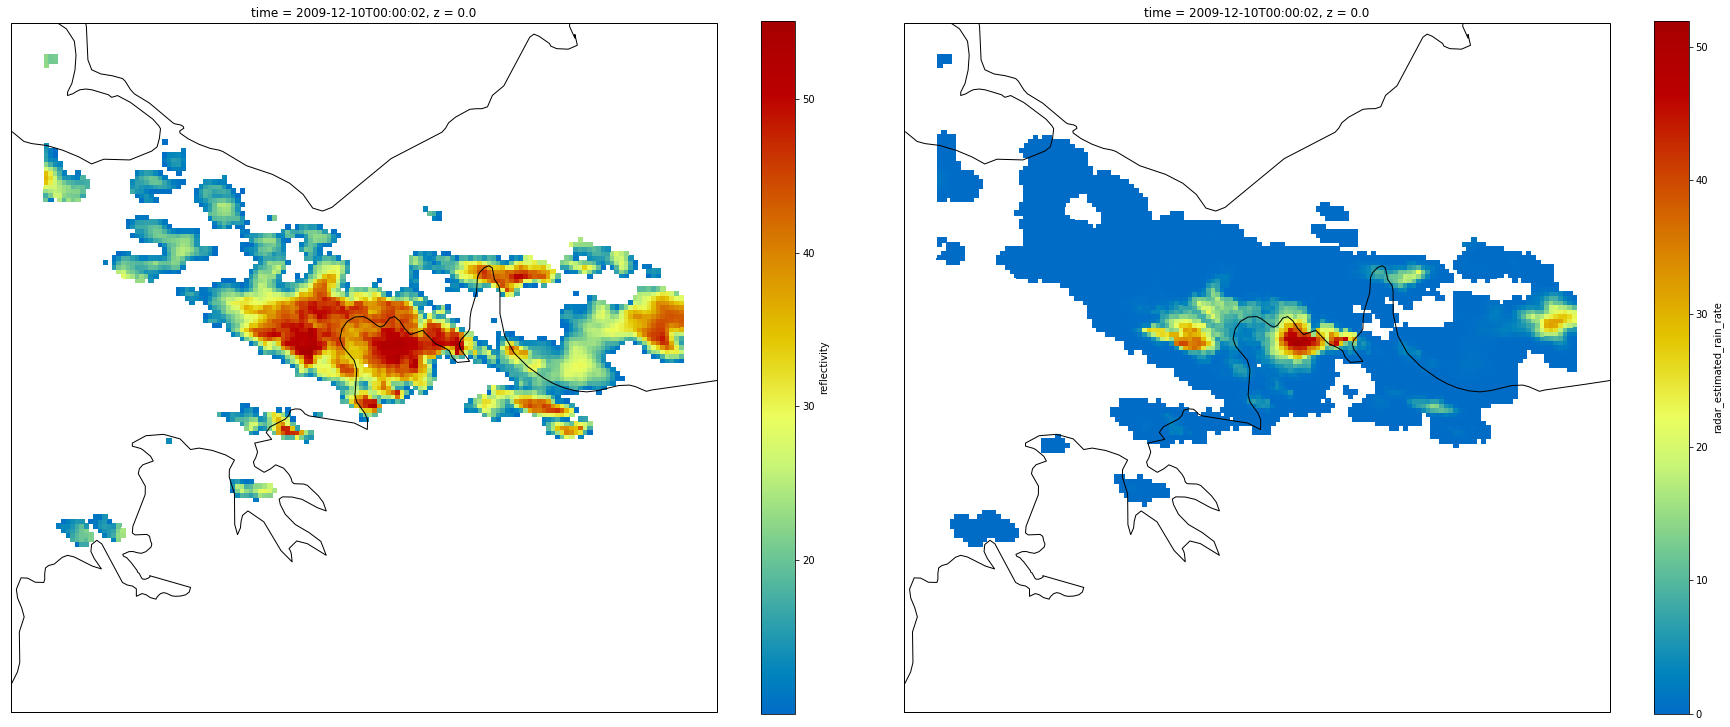

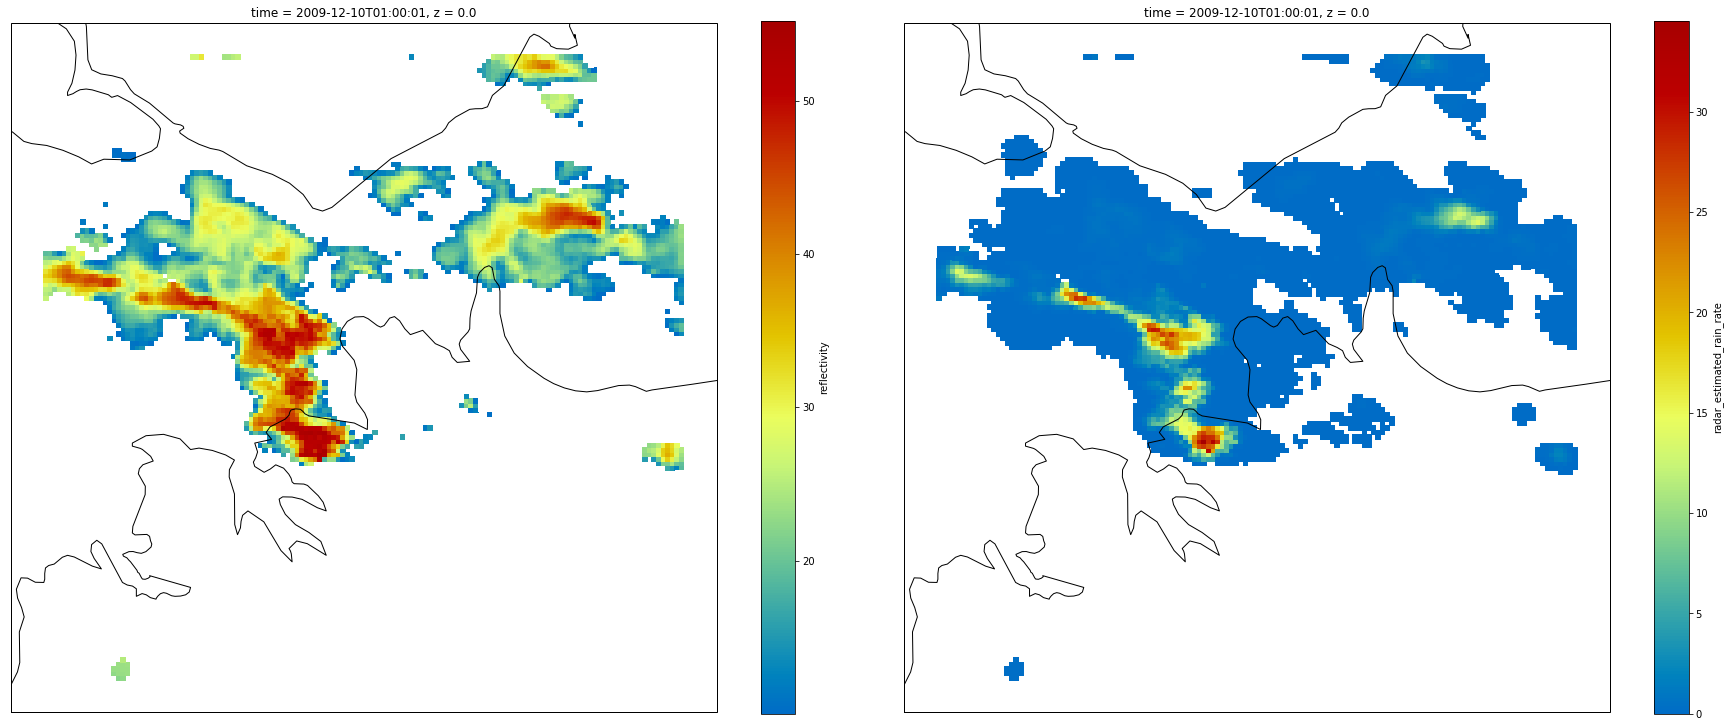

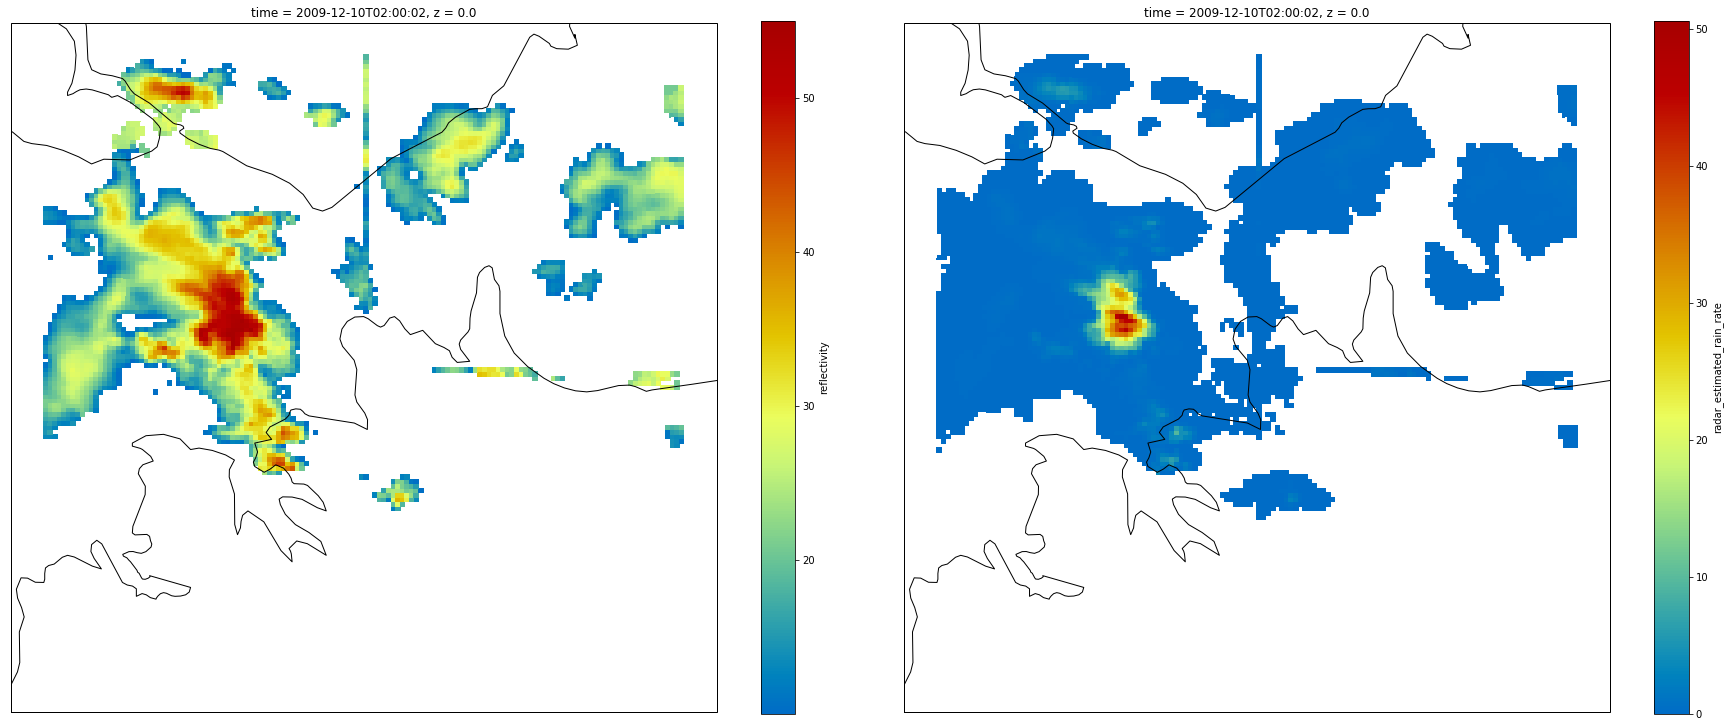

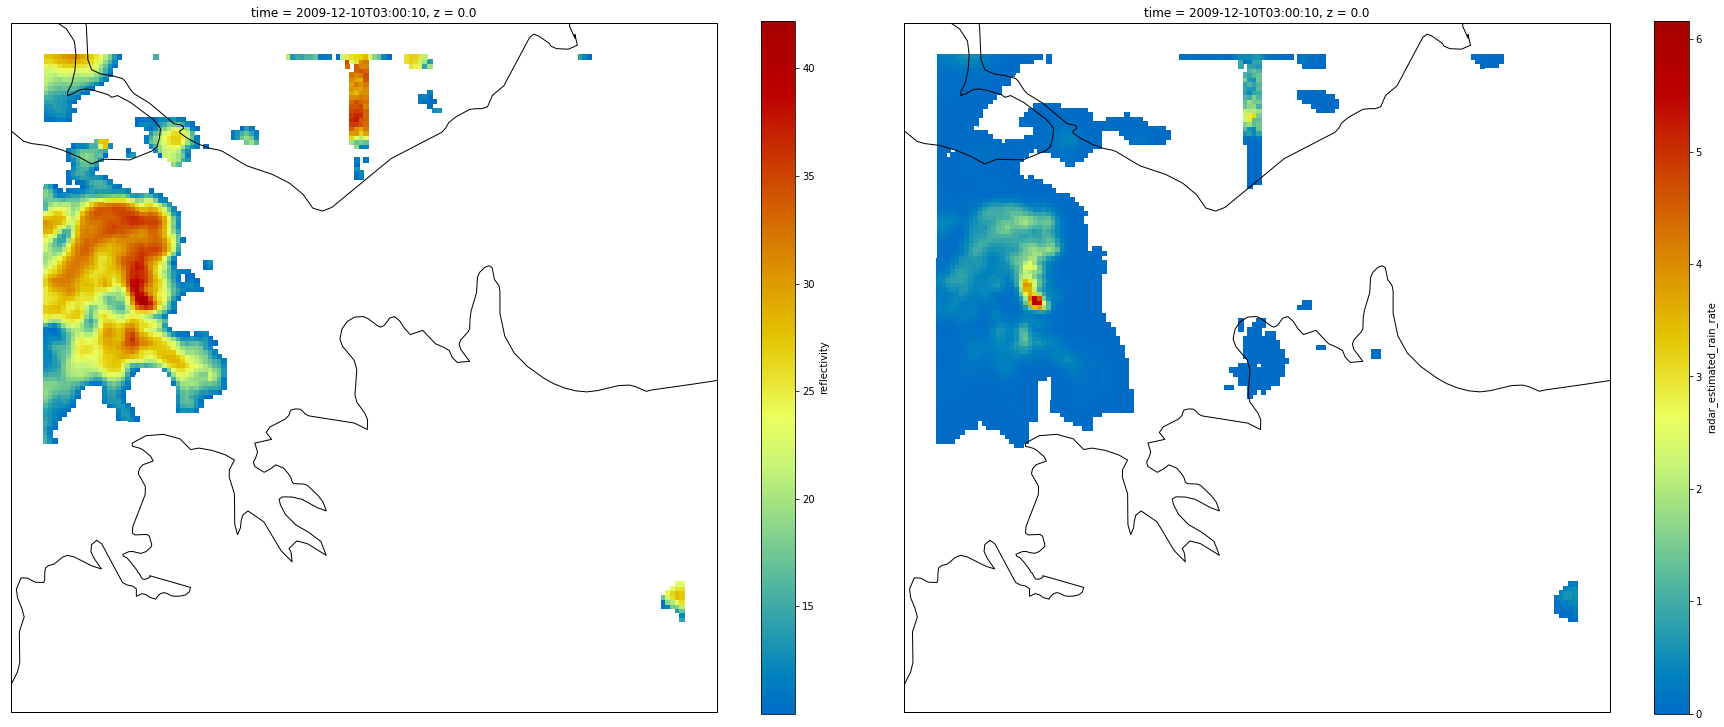

In [116]:
plot_Z_vs_rain_rate(cpol_1_path)
plot_Z_vs_rain_rate(cpol_2_path)
plot_Z_vs_rain_rate(cpol_3_path)
plot_Z_vs_rain_rate(cpol_4_path)